# Memanggil Dataset K03_counter_strike_2.csv

In [13]:
import pandas as pd

dataset = pd.read_csv('K03_counter_strike_2.csv')
dataset

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,de_train,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,T
1996,31.23,7.0,10.0,de_train,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,T
1997,11.23,7.0,10.0,de_train,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,T
1998,174.91,7.0,11.0,de_train,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,T


# Melakukan Preprocessing data

In [2]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
for col in dataset:
    if dataset[col].dtype == 'object':
        dataset[col] = encode.fit_transform(dataset[col])
dataset

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,round_winner
0,175.00,0.0,0.0,0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0
1,156.03,0.0,0.0,0,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,0
2,96.03,0.0,0.0,0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,0
3,76.03,0.0,0.0,0,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,0
4,174.97,1.0,0.0,0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,74.90,7.0,10.0,5,False,327.0,355.0,376.0,183.0,6350.0,13300.0,3.0,1.0,1
1996,31.23,7.0,10.0,5,True,227.0,152.0,276.0,183.0,5000.0,7900.0,2.0,1.0,1
1997,11.23,7.0,10.0,5,True,185.0,105.0,266.0,183.0,5300.0,4450.0,2.0,1.0,1
1998,174.91,7.0,11.0,5,False,500.0,500.0,55.0,0.0,14900.0,32000.0,0.0,0.0,1


# Splitting data X dan Y dengan perbandingan 80:20

In [3]:
from sklearn.model_selection import train_test_split

X = dataset.drop('round_winner', axis=1)
Y = dataset['round_winner']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

# Modelling menggunakan DecisionTreeClassifier()

In [4]:
from sklearn.tree import DecisionTreeClassifier

lutfi = DecisionTreeClassifier(max_depth=4)
lutfi.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

# Akurasi model menggunakan function score()

In [5]:
import numpy as np

akurasi  = lutfi.score(x_train, y_train)*100
print("Akurasi dari model DecisionTreeClassifier ini adalah: ", np.round(akurasi,2),"%")

Akurasi dari model DecisionTreeClassifier ini adalah:  77.0 %


# Prediksi data testing

In [9]:
predict = lutfi.predict(x_test)
predict.shape

(400,)

# Evaluasi model melihat dari accuracy_model nya

In [7]:
import numpy as np
from sklearn.metrics import accuracy_score

akurasi = accuracy_score(predict, y_test)

print(f'Akurasi dari model: {np.round((akurasi*100),2)}%')

Akurasi dari model: 77.75%


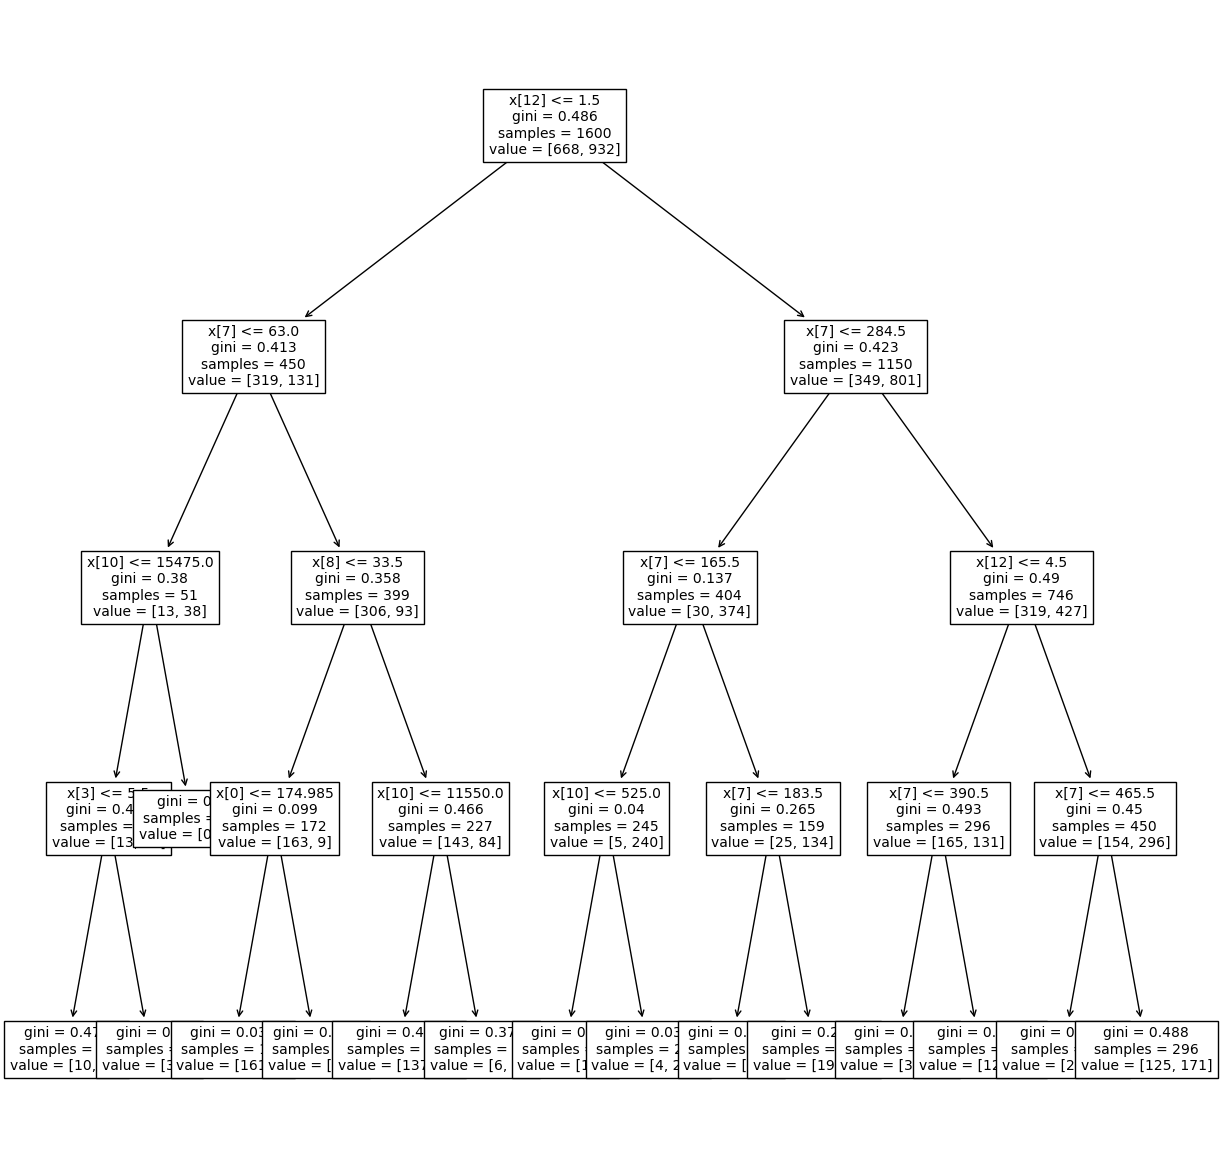

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
tree.plot_tree(lutfi, fontsize=10)
plt.show()